# Import library and load dataset

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e6:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F73290%2F8710574%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240611%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240611T084628Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5db042e735486ad61362f649d1dd1bbc5fafb68480653aa06ced7a5ede449d47053af29414f1541a4f74ce1217d6a5dde885c374584250dda139ca11268f47bf58a8d16448e0def85b1ee6014b9c619926bcd123e42336b514304f53b9f4301f1d40febdb3c0a7674ccb256aac70e23c06879e545cf1ec7ec3f2e7dc4a4042de483c797c81d55dbd9ac1cc2e6c897cfa5cbf17750b94d71c4eff73e75f40e3e73d9c77ef86000e6ecb4bd4e9c55bccd079202bbacc05df65d2b84d03d7fb605b3f56d2b0bc6944df6eeefe9b87fa5d4eac53a59395e44bdc0b4c29980c3dfcd3a6cbf4399d5a4d85b92a219dd65bb39942784ad283dbc75e578a9f040bb56924'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 3217279 bytes downloaded
Downloaded and uncompressed: playground-series-s4e6
Data source import complete.


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv
/kaggle/input/playground-series-s4e6/sample_submission.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Regularization, Estimator
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import * # RMSLE, RMSE, r2, accuracy_score

from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Classifier
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *

# Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Scaler, Encoder, Regulariation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [ ]:
train = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
submission = pd.read_csv('/kaggle/input/playground-series-s4e6/sample_submission.csv')

# Preparation for EDA

In [ ]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0,1,2,3,4,5,6,7,8,9
Marital status,1,1,1,1,1,1,1,1,1,1
Application mode,1,17,17,1,1,39,44,1,39,1
Application order,1,1,2,3,2,1,1,1,1,6
Course,9238,9238,9254,9500,9500,171,9085,9773,9003,9500
Daytime/evening attendance,1,1,1,1,1,1,1,1,1,1
Previous qualification,1,1,1,1,1,19,39,1,1,1
Previous qualification (grade),126.0,125.0,137.0,131.0,132.0,133.1,130.0,130.0,133.1,135.0
Nacionality,1,1,1,1,1,1,1,1,1,1
Mother's qualification,1,19,3,19,19,19,37,19,19,37


In [ ]:
id_train, y_train = train['id'], train['Target']
train = train.drop('id', axis=1)

In [ ]:
num_cols = train.select_dtypes(exclude = ['object']).columns

In [ ]:
train_target = train['Target']

Q. How to encode the target value? > A. LabelEncoder

In [ ]:
train['target_encoded'] = LabelEncoder().fit_transform(train['Target'])

In [ ]:
train['target_encoded'].value_counts()

target_encoded
2    36282
0    25296
1    14940
Name: count, dtype: int64

In [ ]:
train = train.drop(['Target'], axis=1) # Drop Target(object)

In [ ]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
Marital status,1.000000,1.00,1.00,1.00000,1.000000,1.00,1.00,1.000000,1.00,1.000000
Application mode,1.000000,17.00,17.00,1.00000,1.000000,39.00,44.00,1.000000,39.00,1.000000
Application order,1.000000,1.00,2.00,3.00000,2.000000,1.00,1.00,1.000000,1.00,6.000000
Course,9238.000000,9238.00,9254.00,9500.00000,9500.000000,171.00,9085.00,9773.000000,9003.00,9500.000000
Daytime/evening attendance,1.000000,1.00,1.00,1.00000,1.000000,1.00,1.00,1.000000,1.00,1.000000
Previous qualification,1.000000,1.00,1.00,1.00000,1.000000,19.00,39.00,1.000000,1.00,1.000000
Previous qualification (grade),126.000000,125.00,137.00,131.00000,132.000000,133.10,130.00,130.000000,133.10,135.000000
Nacionality,1.000000,1.00,1.00,1.00000,1.000000,1.00,1.00,1.000000,1.00,1.000000
Mother's qualification,1.000000,19.00,3.00,19.00000,19.000000,19.00,37.00,19.000000,19.00,37.000000
Father's qualification,19.000000,19.00,19.00,3.00000,37.000000,19.00,37.00,37.000000,19.00,37.000000


Learned from before note
- Na value doesn't exist in dataframe
- Low-correlation column exist, but it could be meangful

# Visualization

Learned from before note
- If bin size is too large, visualization is usless

In [ ]:
low_bin_cols = [] # len : 15

for col in num_cols :
  if len(train[col].unique()) < 15 :
    low_bin_cols.append(col)

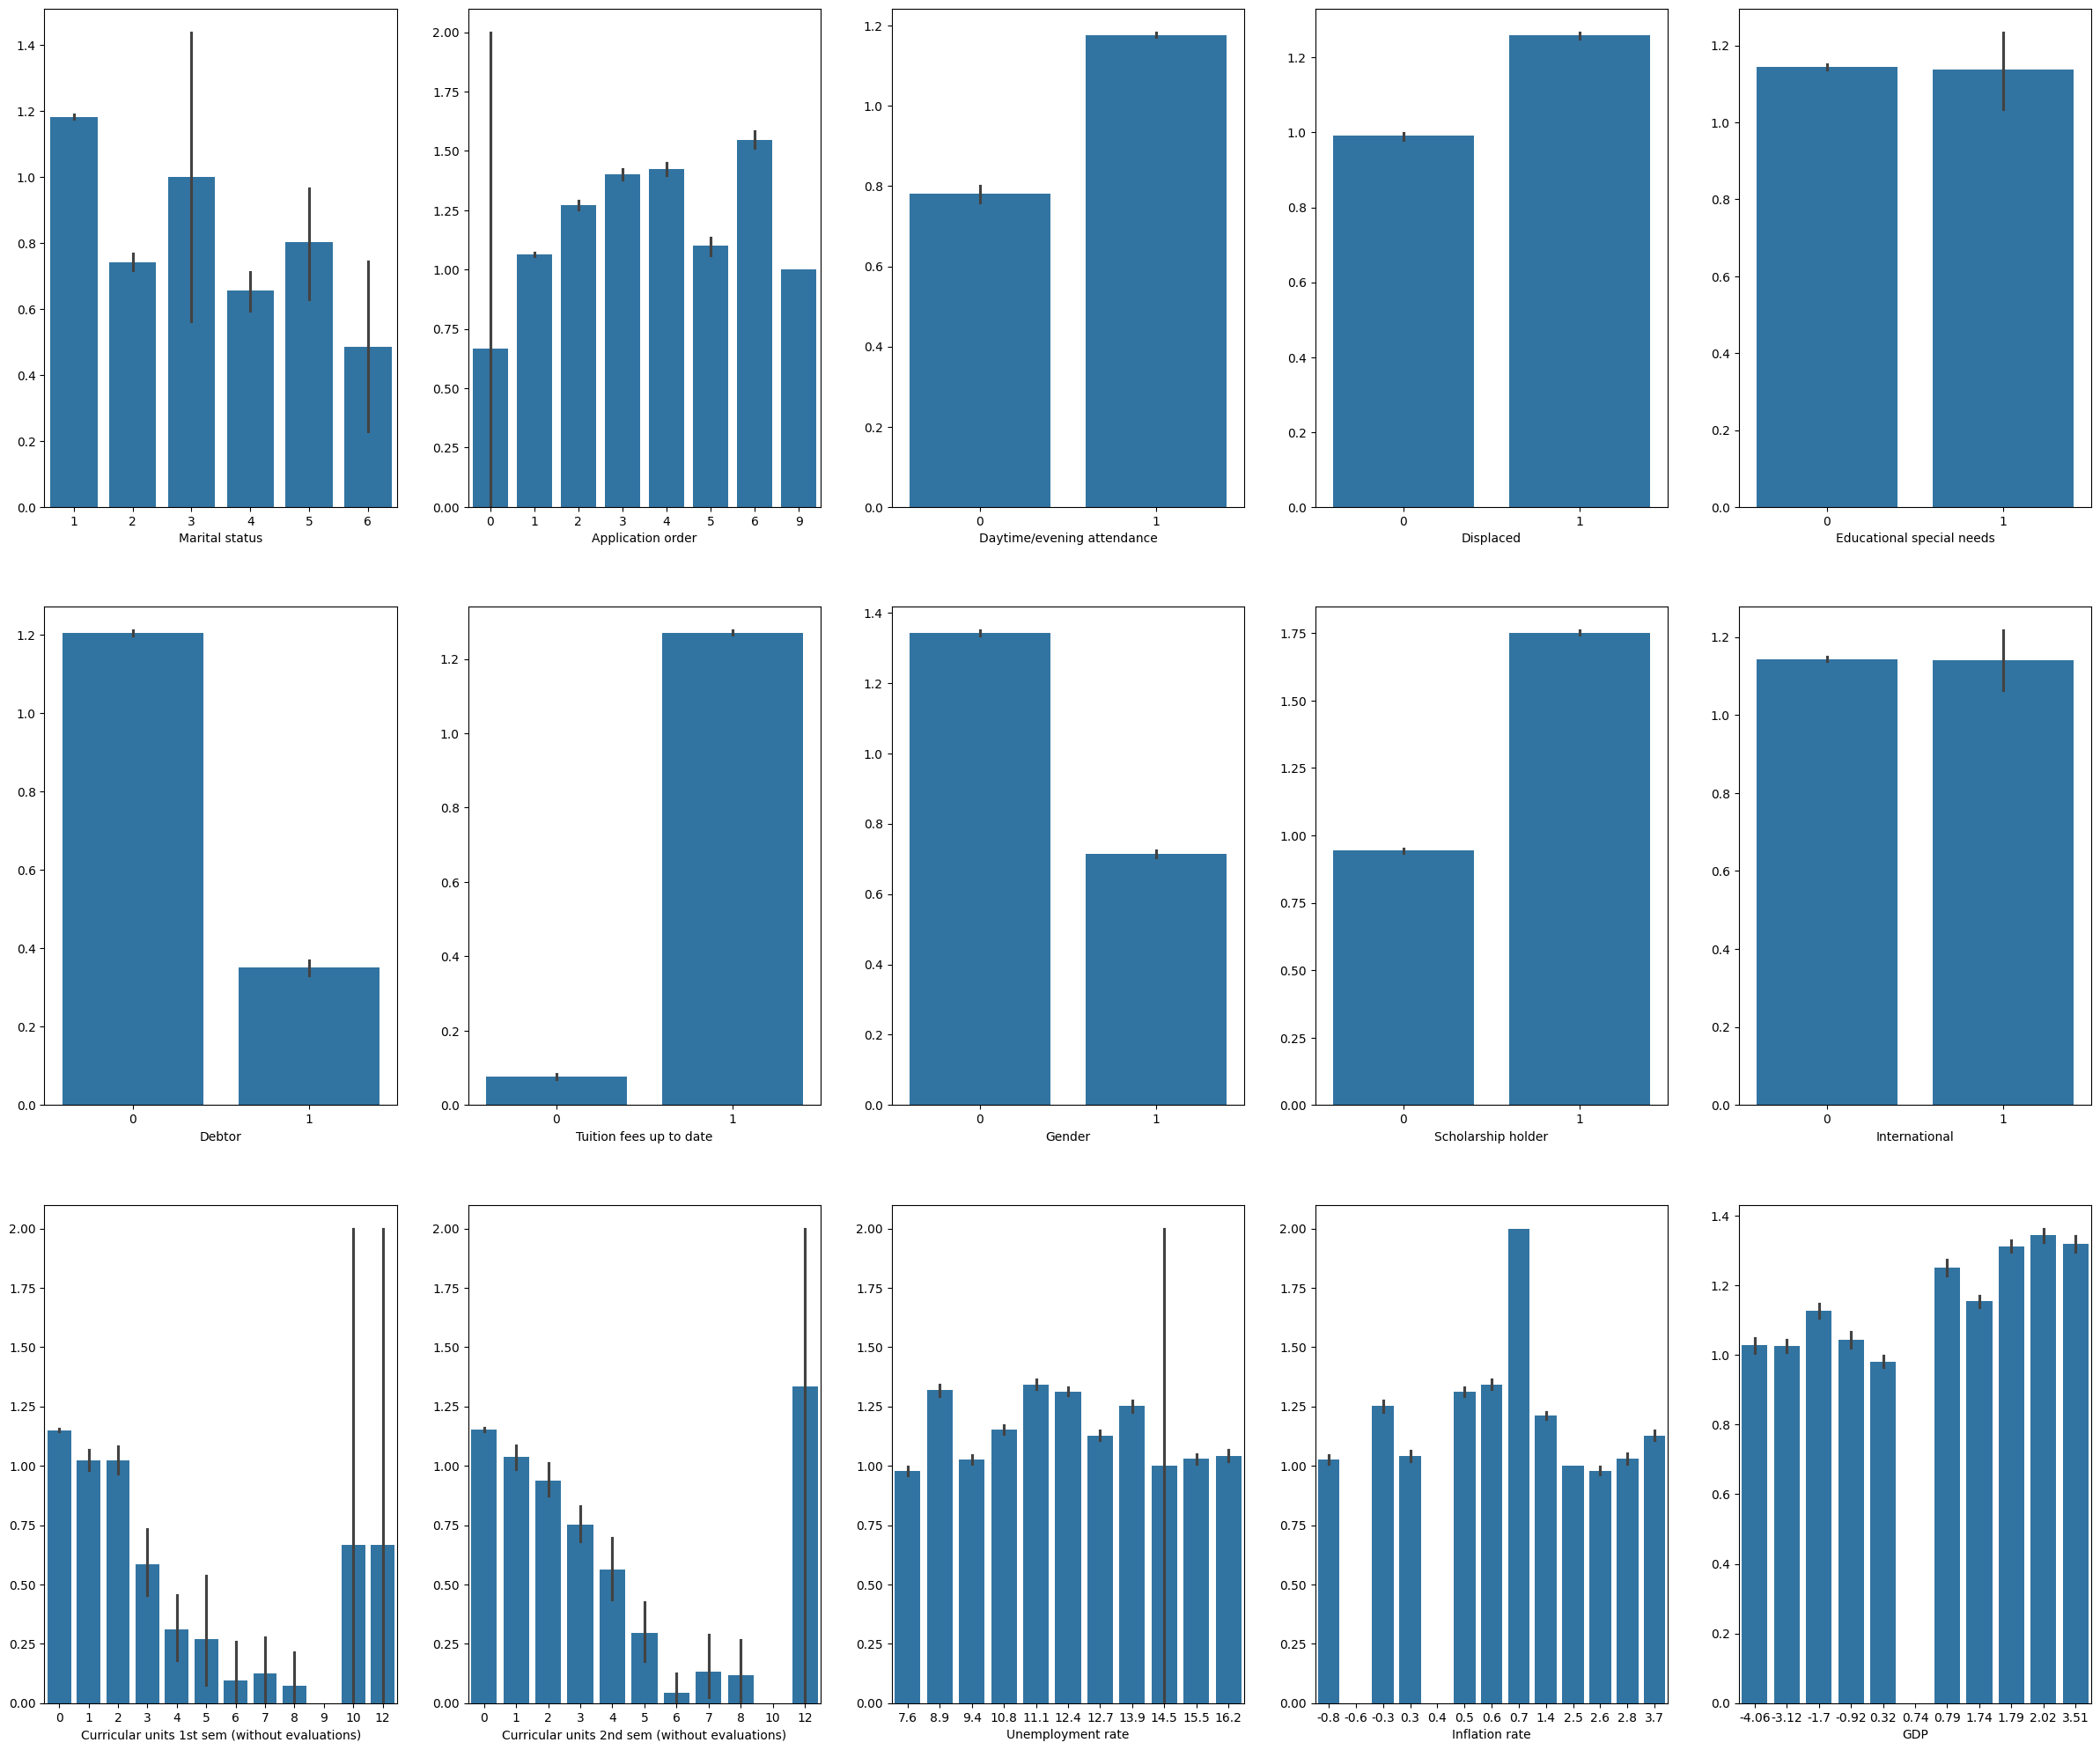

In [ ]:
figure, axes = plt.subplots(nrows=3, ncols=5, label='off', figsize=(30, 25))
n = 0

for i in range(3) :
  for j in range(5) :
    sns.barplot(x=low_bin_cols[n], y=train['target_encoded'], data=train, ax=axes[i, j])
    axes[i, j].set_ylabel('')
    n += 1

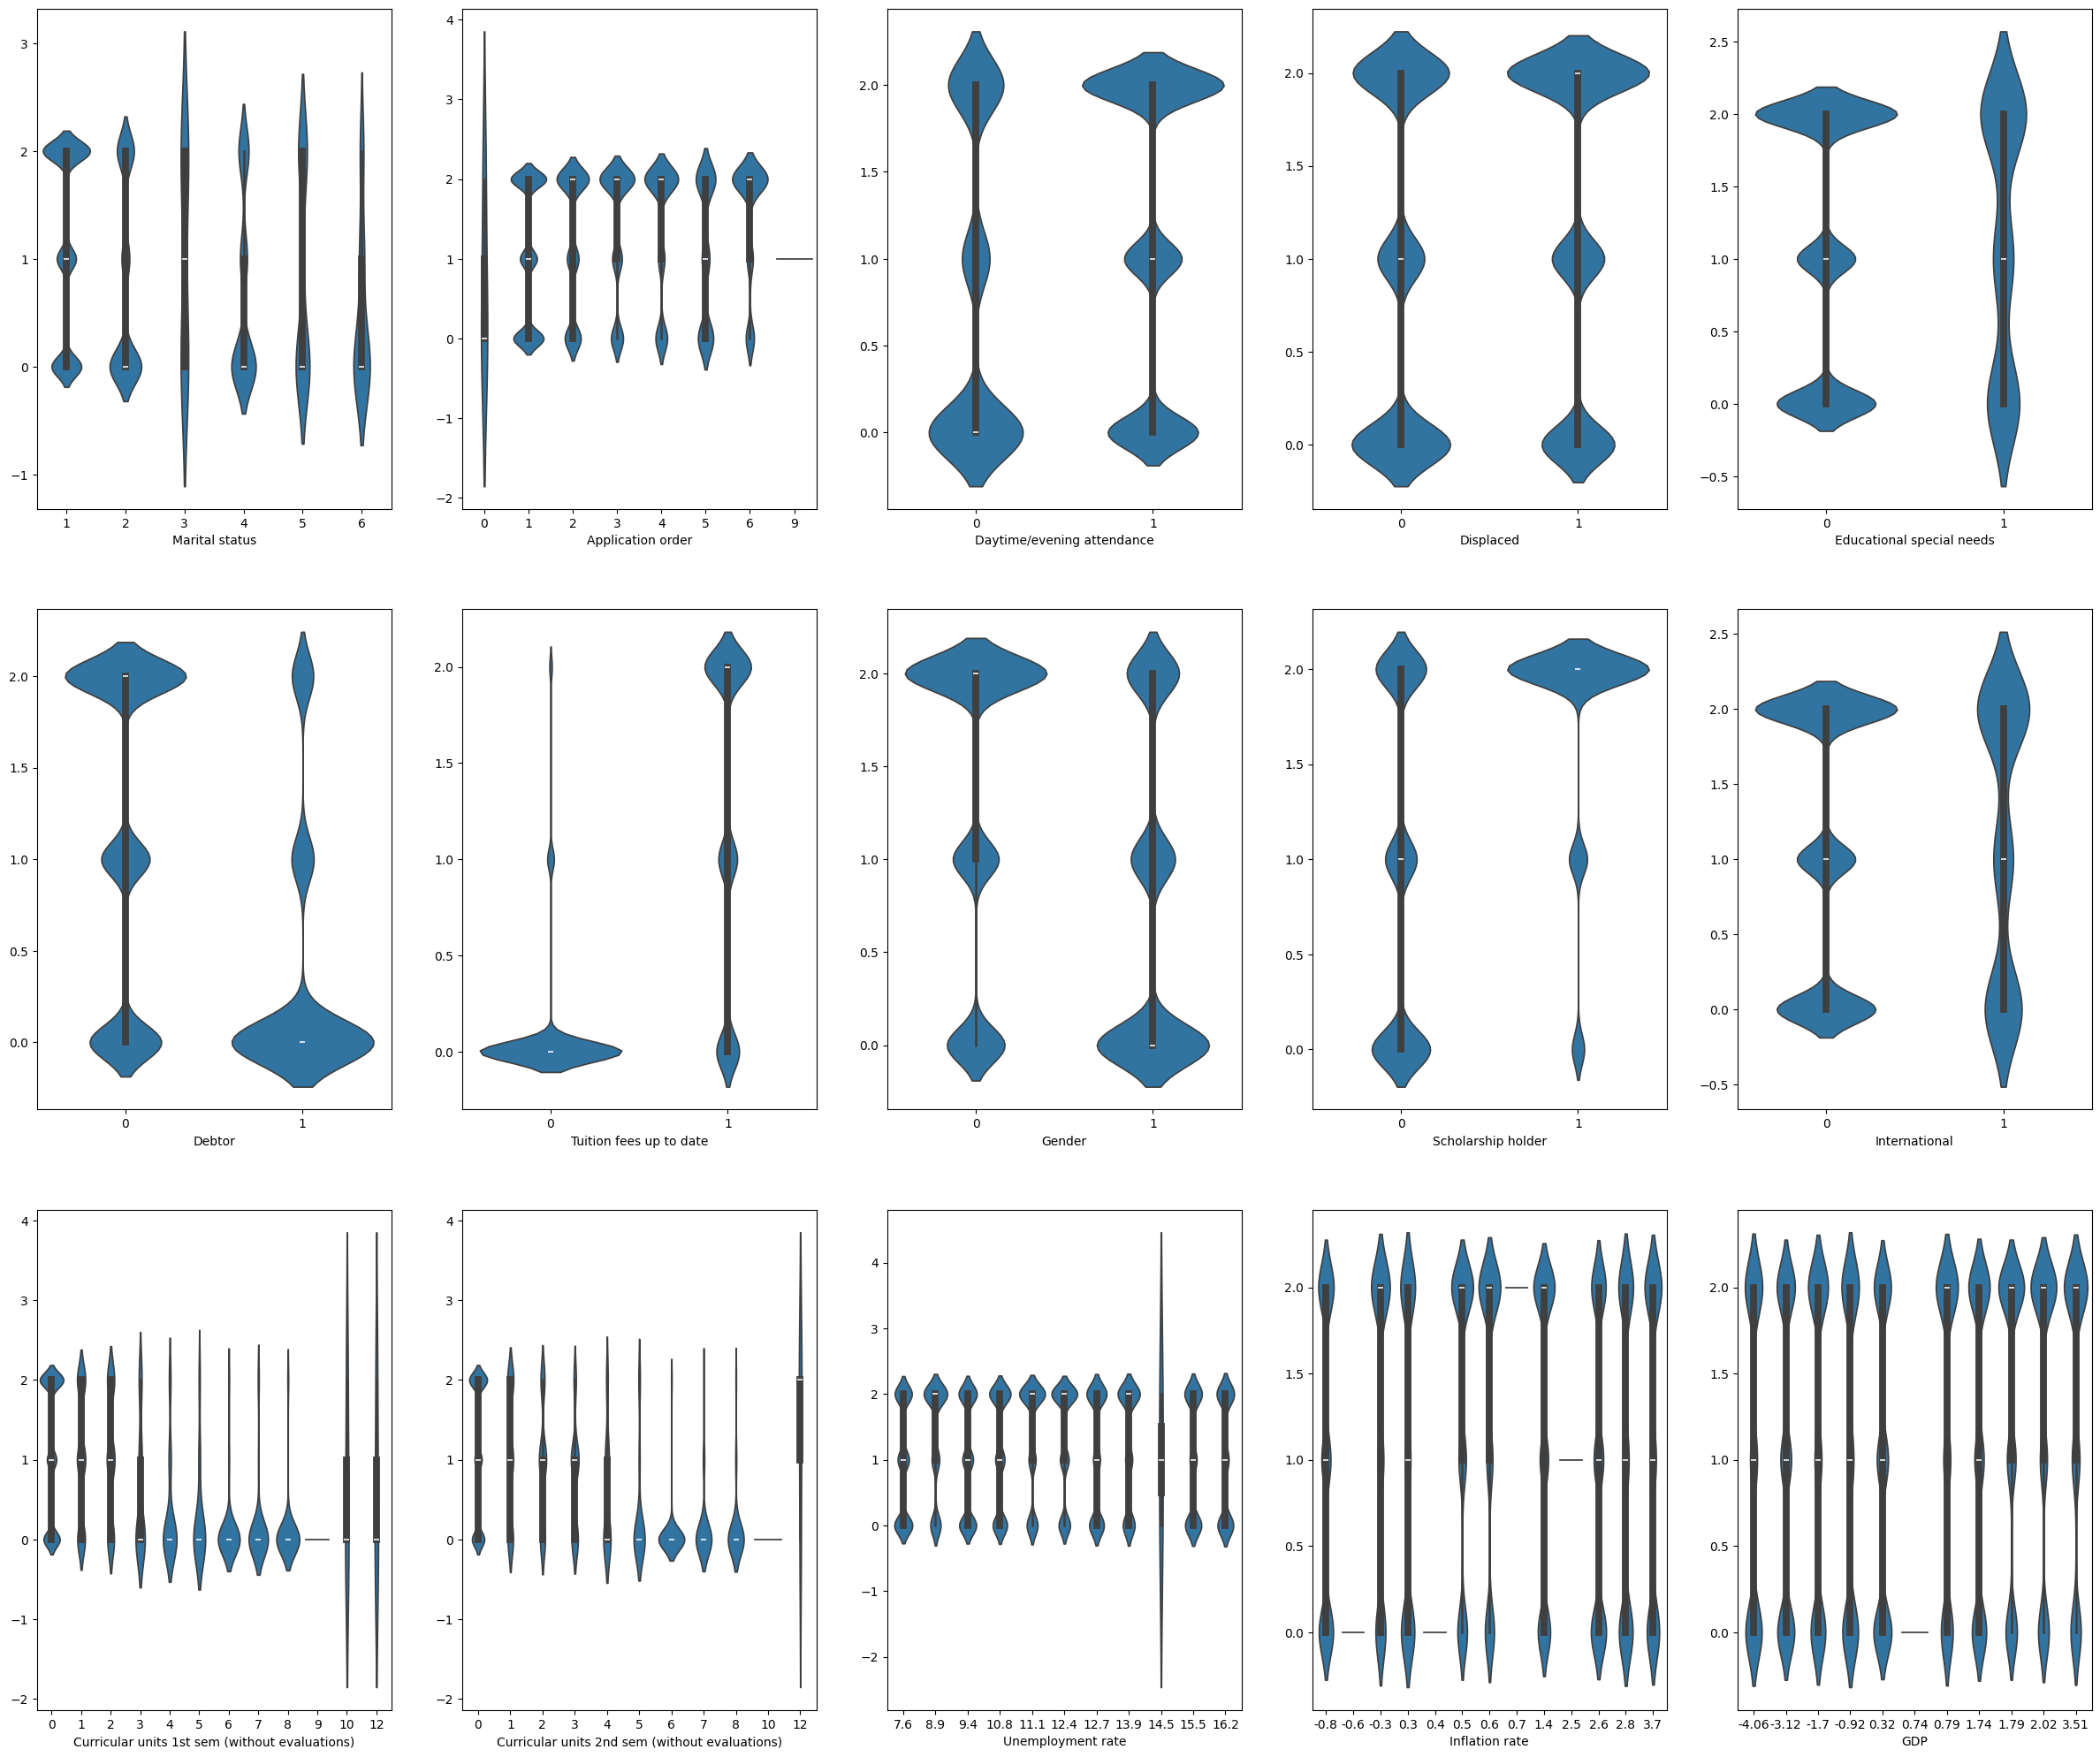

In [ ]:
figure, axes = plt.subplots(nrows=3, ncols=5, label='off', figsize=(30, 25))
n = 0

for i in range(3) :
  for j in range(5) :
    sns.violinplot(x=low_bin_cols[n], y=train['target_encoded'], data=train, ax=axes[i, j])
    axes[i, j].set_ylabel('')
    n += 1

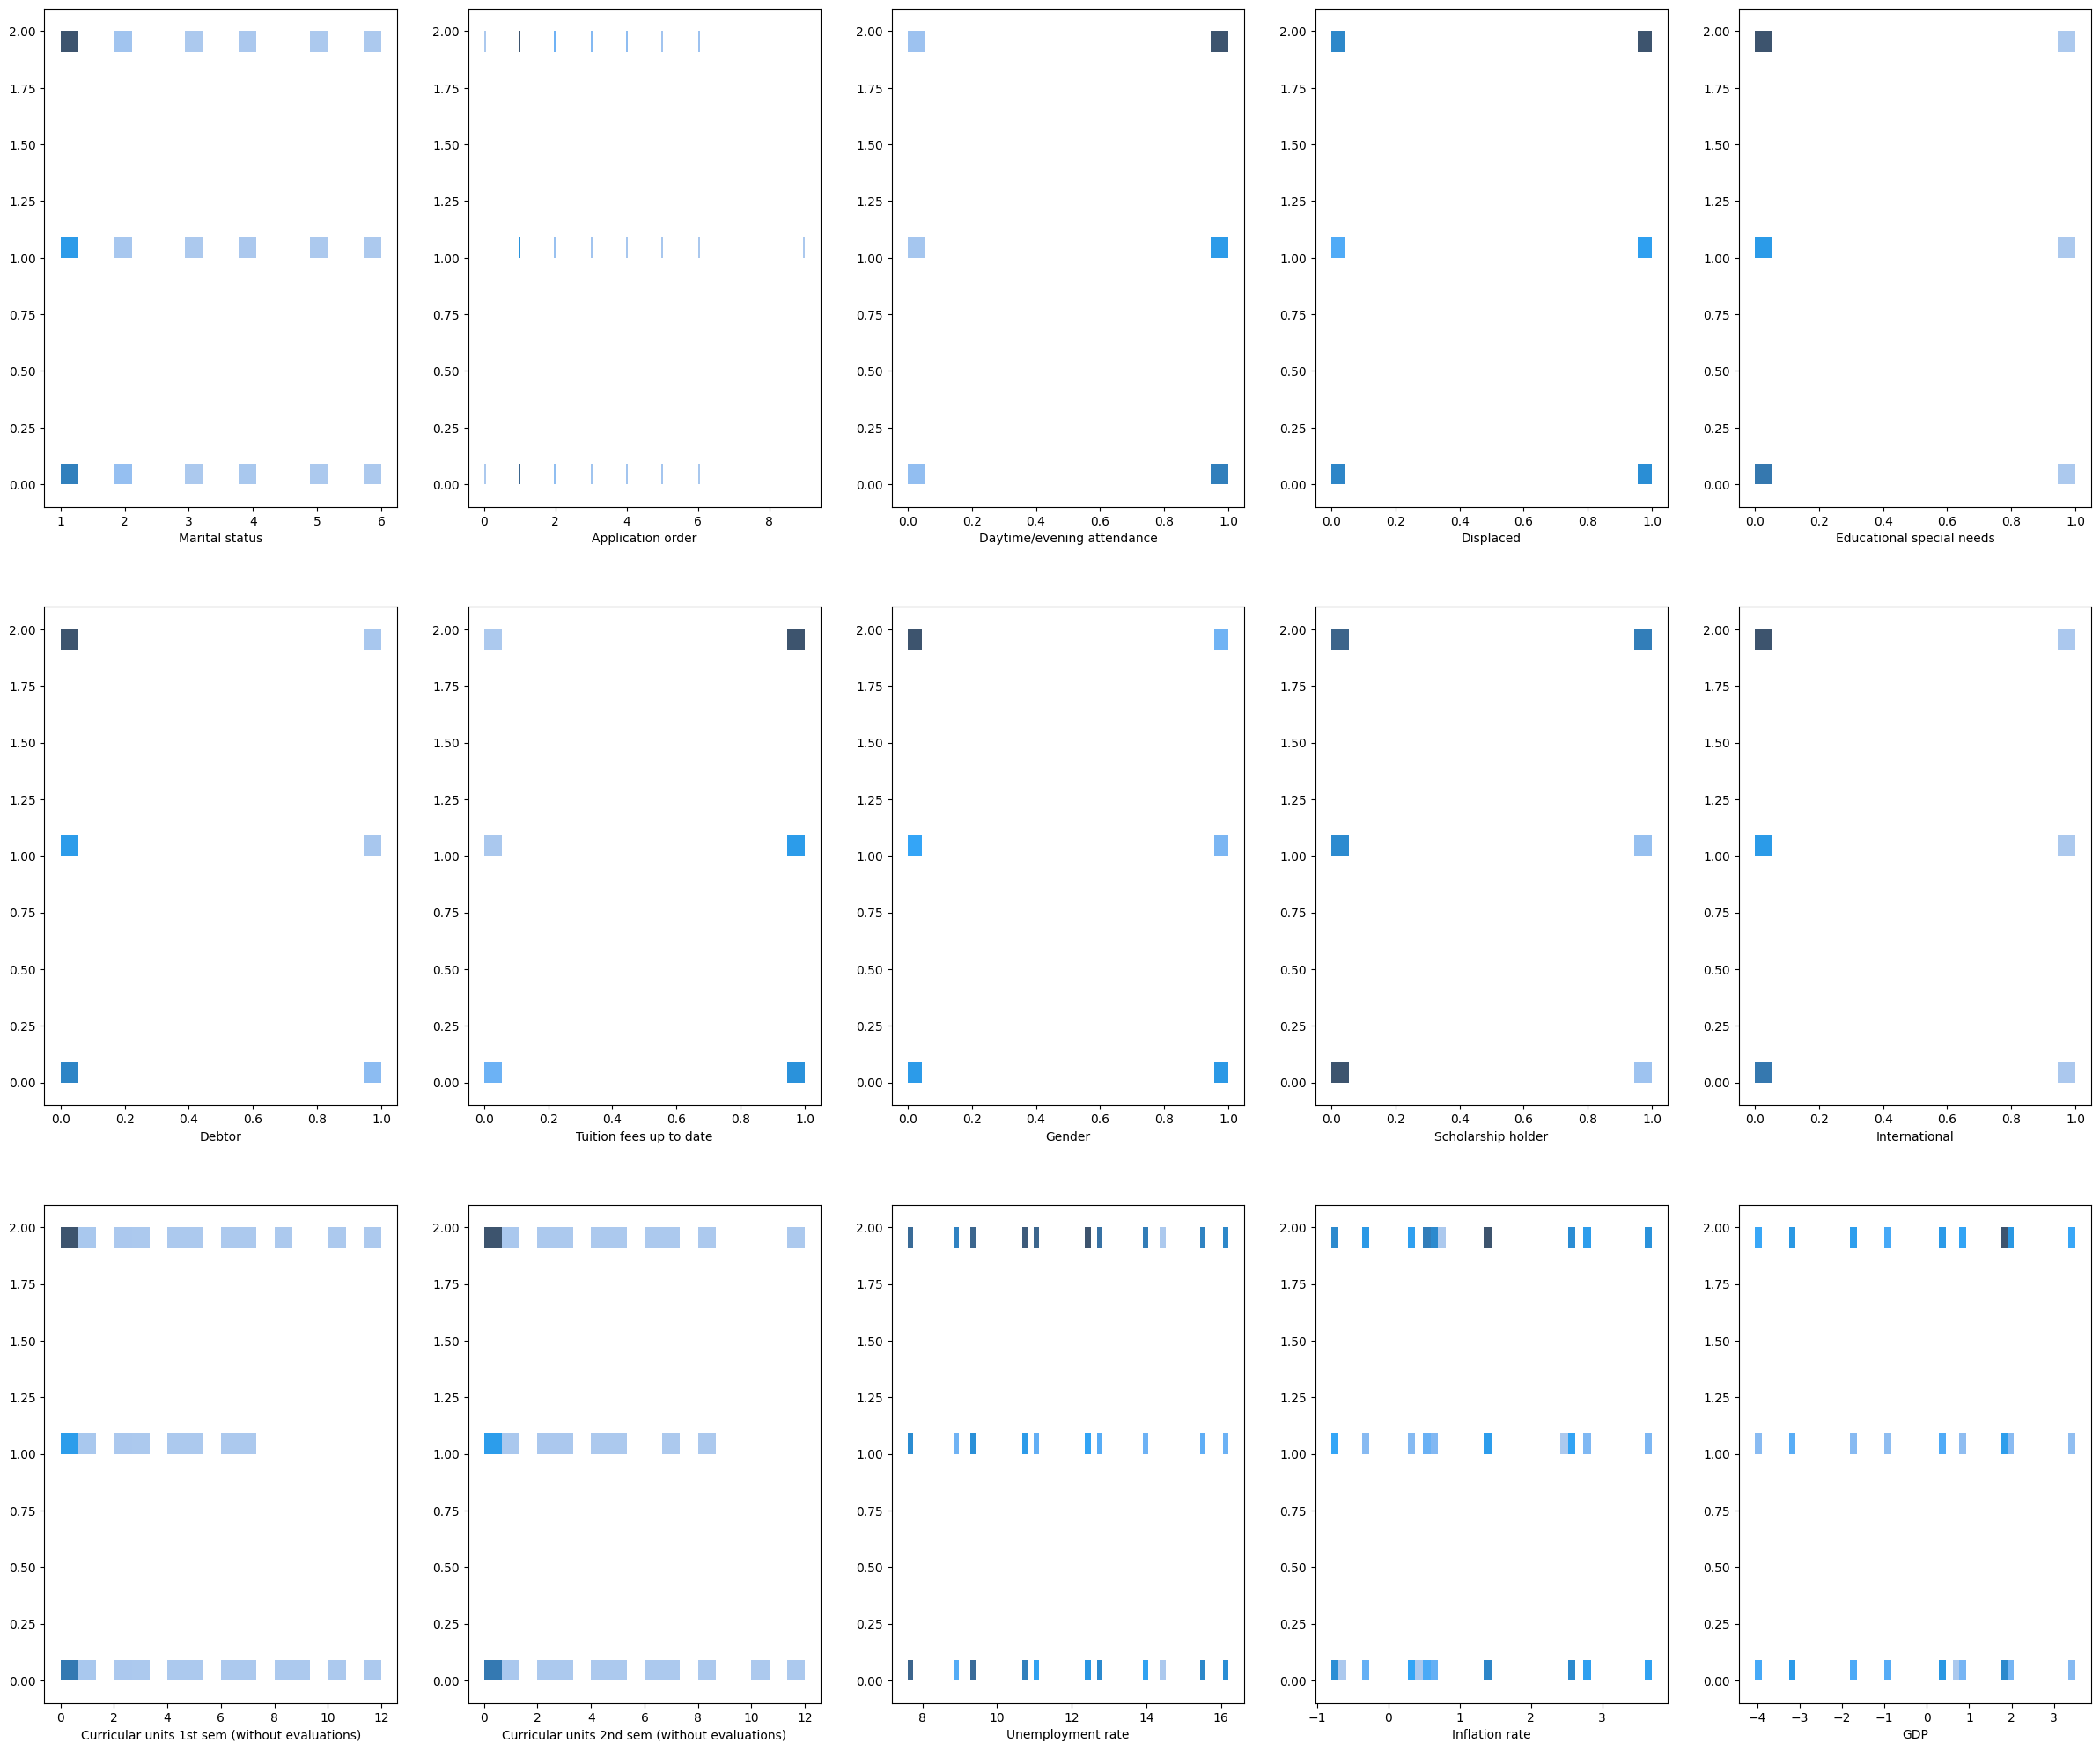

In [ ]:
figure, axes = plt.subplots(nrows=3, ncols=5, label='off', figsize=(30, 25))
n = 0

for i in range(3) :
  for j in range(5) :
    sns.histplot(x=low_bin_cols[n], y=train['target_encoded'], data=train, ax=axes[i, j])
    axes[i, j].set_ylabel('')
    n += 1

- Small sample size doesn't always mean outlier
- ...

# Model baseline

In [ ]:
# Corr : Numeric features & target
low_corr_cols = [] # Features which has low(0.035) correlation

for i, n in enumerate(train[num_cols].corr().iloc[:, -1]) :
  if abs(n) < 0.035 : low_corr_cols.append(num_cols[i]) # len : 12

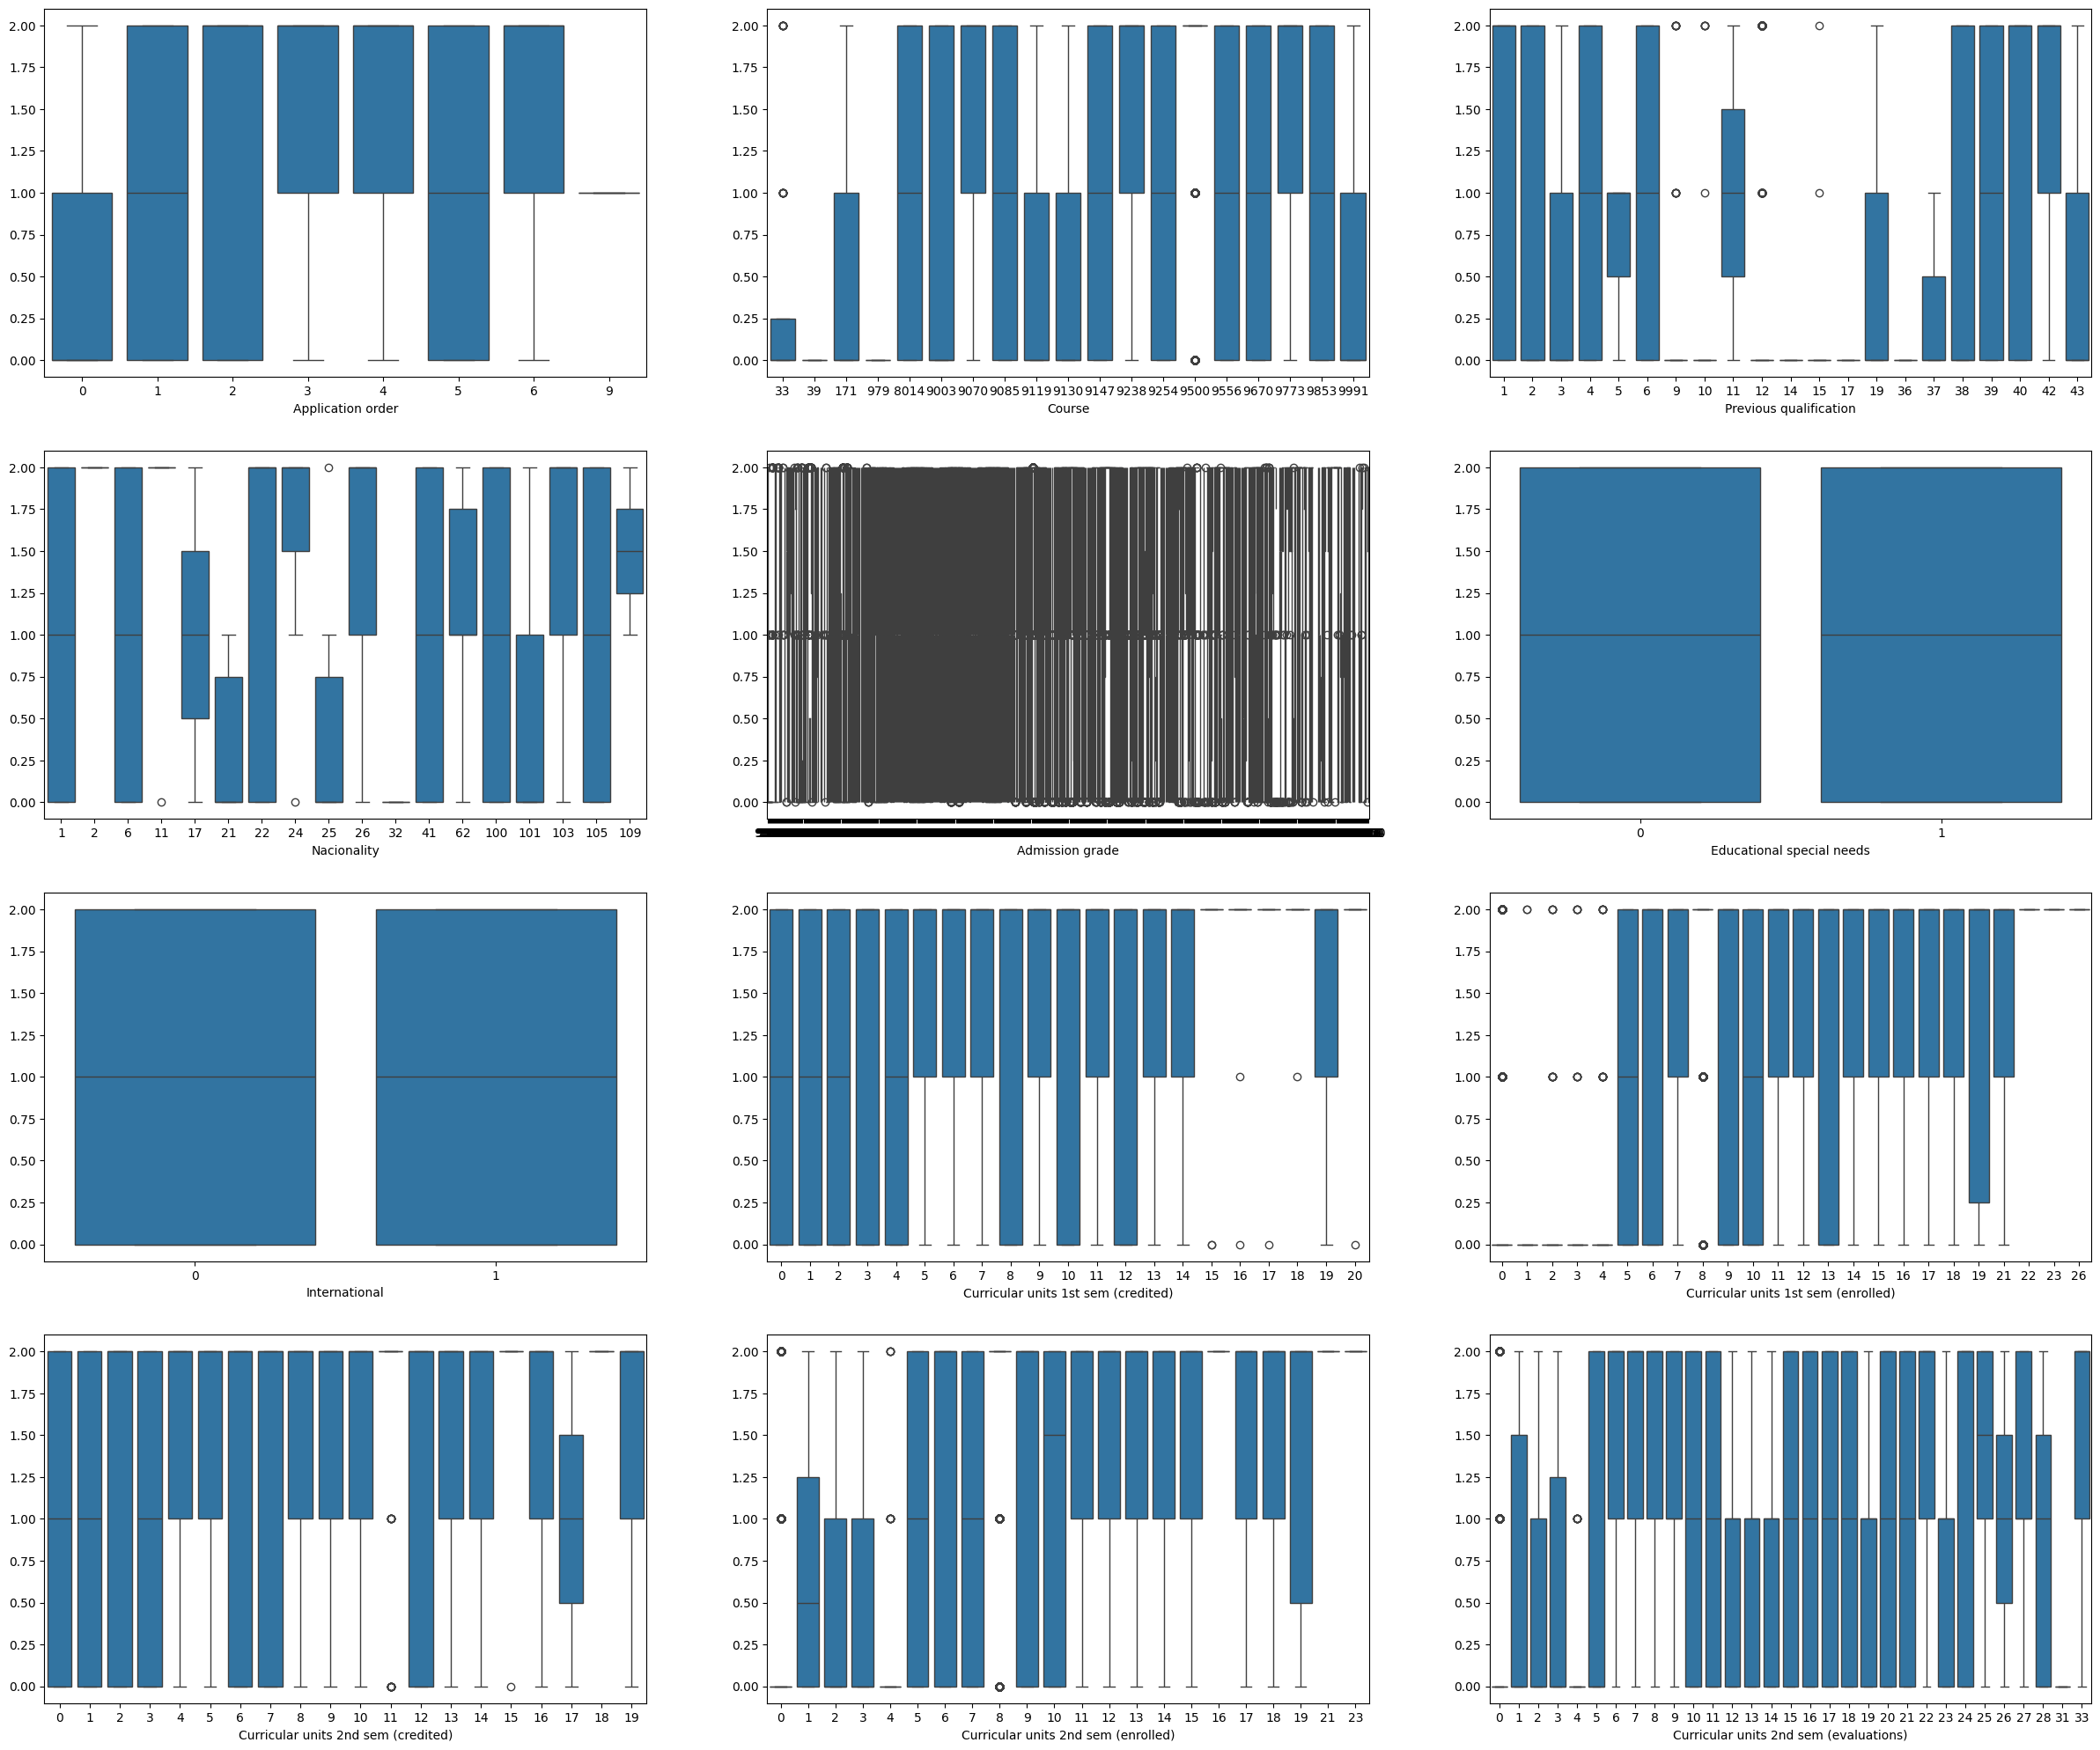

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=3, label='off', figsize=(30, 25))
n = 0

for i in range(4) :
  for j in range(3) :
    sns.boxplot(x=low_corr_cols[n], y=train['target_encoded'], data=train, ax=axes[i, j])
    axes[i, j].set_ylabel('')
    n += 1

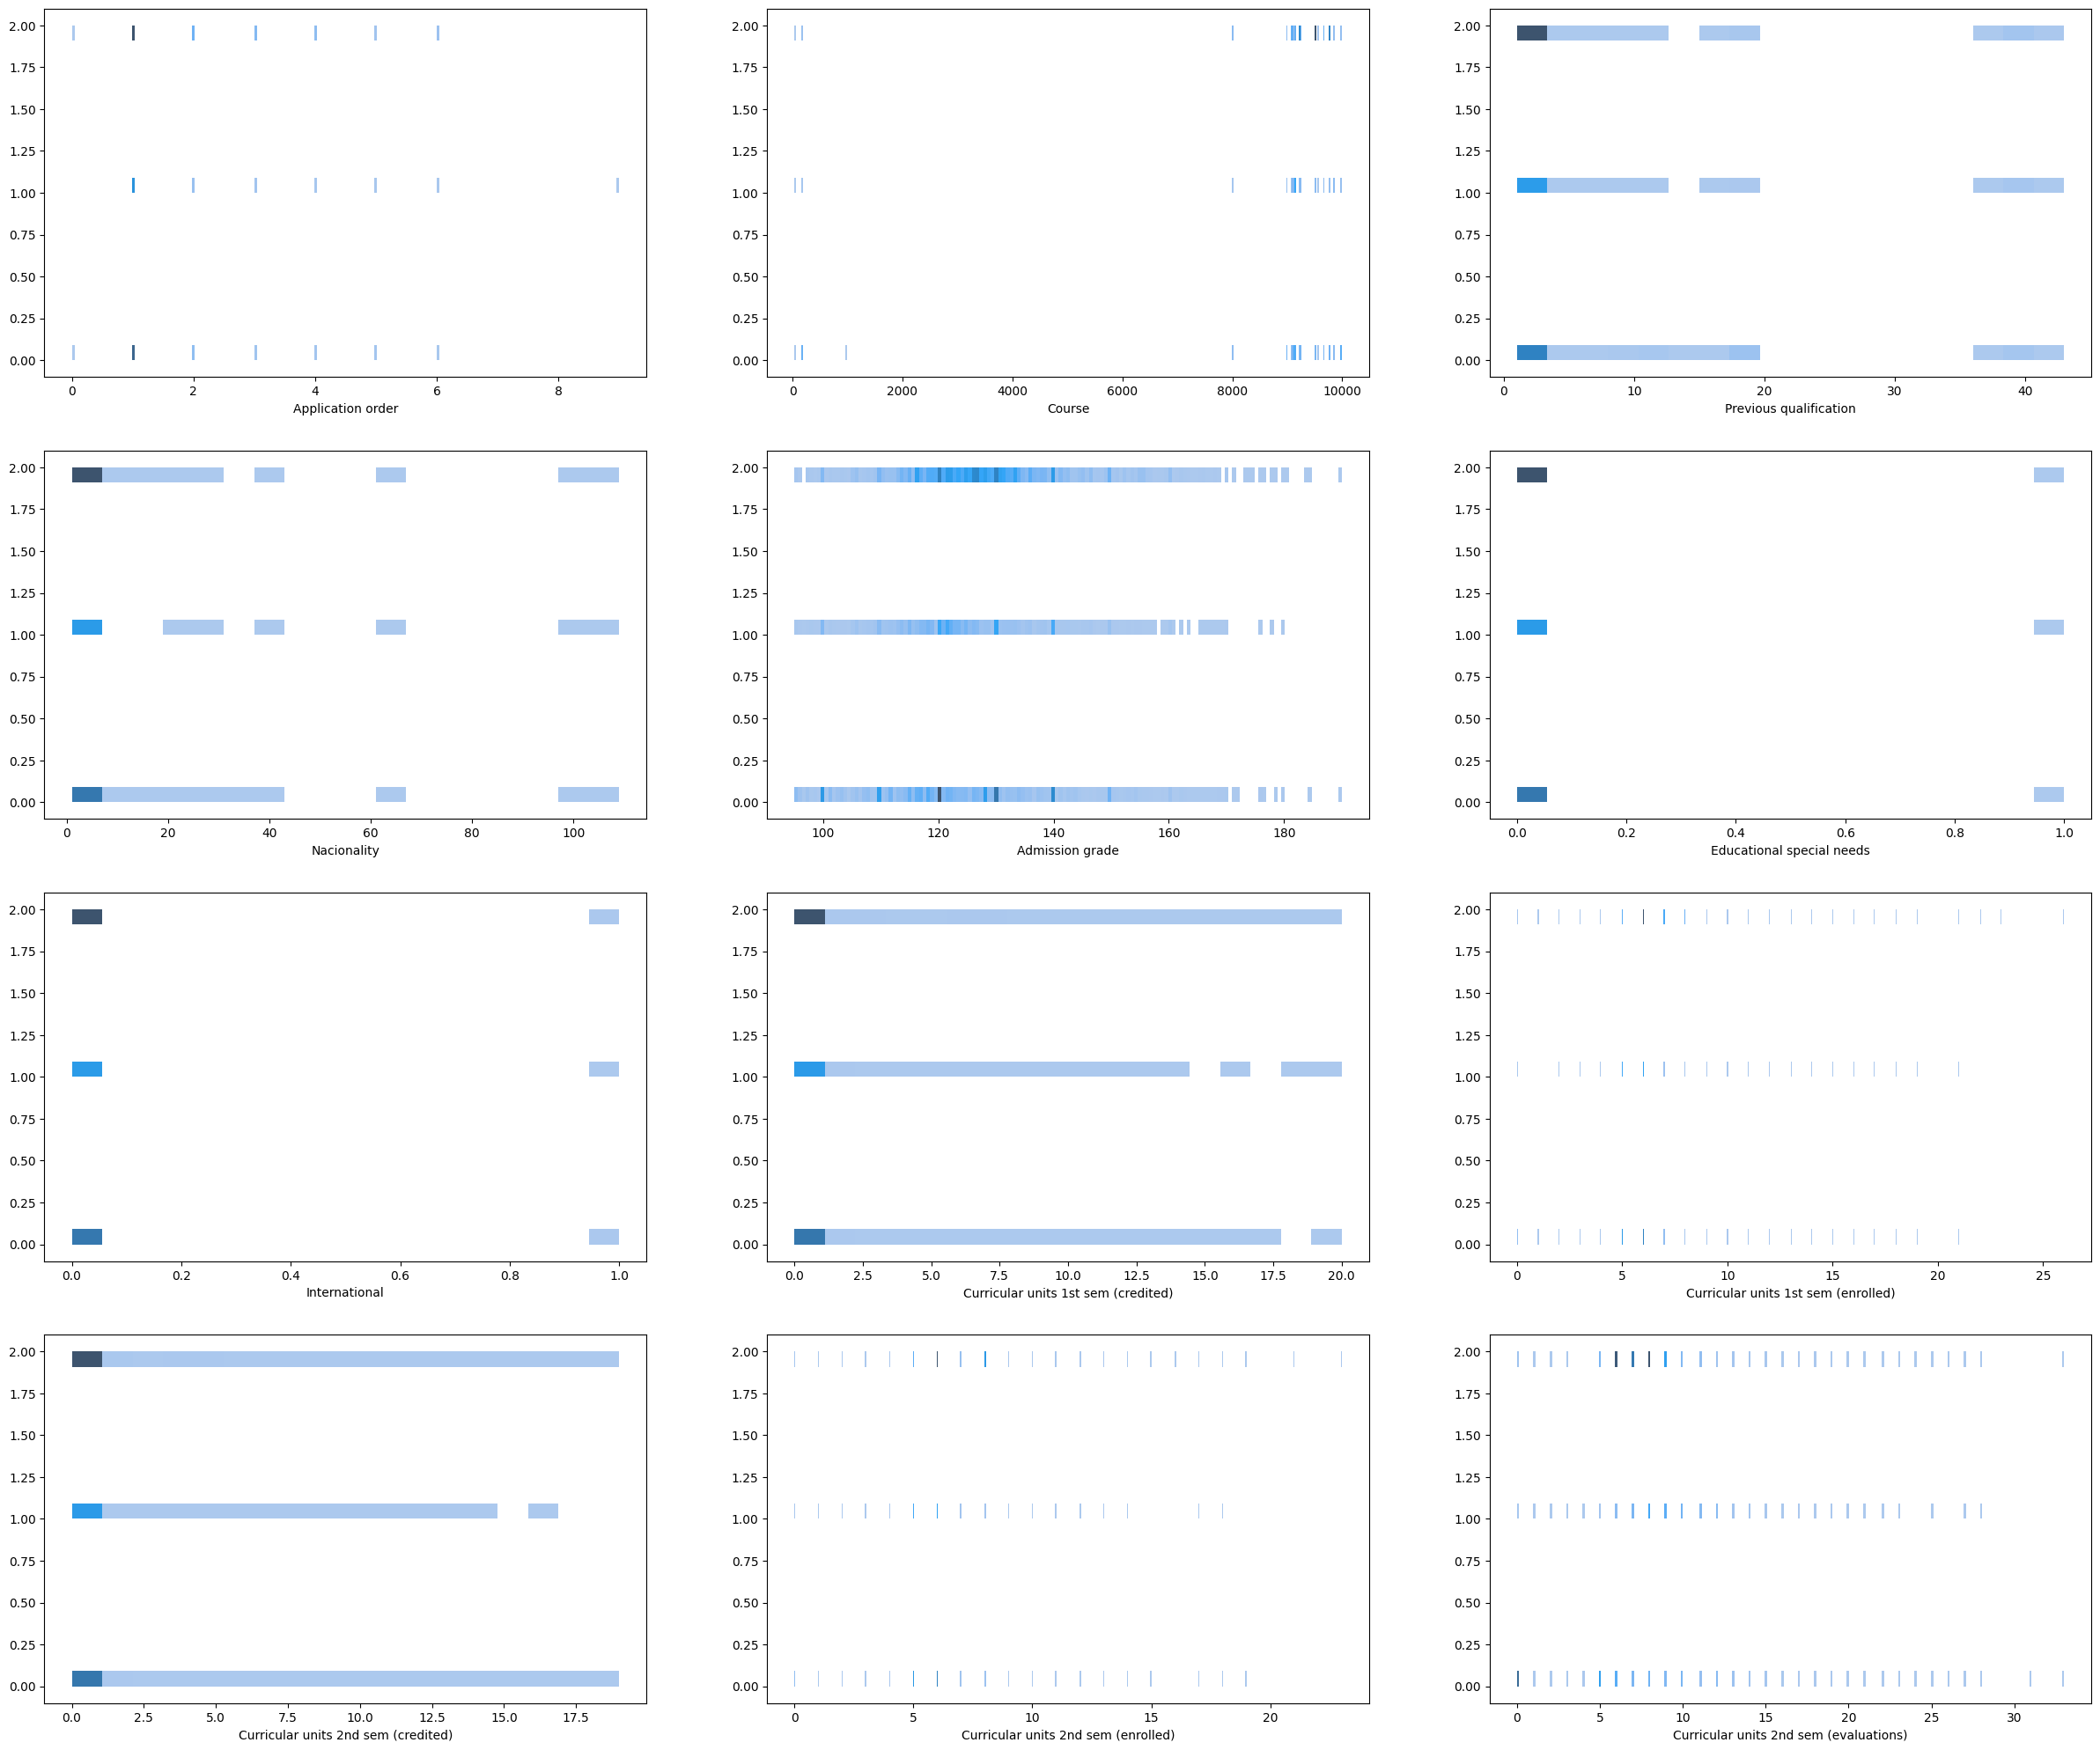

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=3, label='off', figsize=(30, 25))
n = 0

for i in range(4) :
  for j in range(3) :
    sns.histplot(x=low_corr_cols[n], y=train['target_encoded'], data=train, ax=axes[i, j])
    axes[i, j].set_ylabel('')
    n += 1

- 'International', 'Educational special needs' are meaningless features > drop

In [ ]:
train = train.drop(['International', 'Educational special needs'], axis=1)

In [ ]:
train.shape

(76518, 35)

# Model : XGBoost

In [ ]:
test_id = test['id']
test = test.drop('id', axis=1)

In [ ]:
# Drop meaningless features
X_train = train.drop(['International', 'Educational special needs', 'target_encoded'], axis=1)

In [ ]:
X_train.shape

(76518, 34)

In [ ]:
le, xgb_model = LabelEncoder(), XGBClassifier()

y_trans = le.fit_transform(y_train)
xgb_model.fit(X_train, y_trans)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

3. Drop meaningless features

In [ ]:
y_pred = xgb_model.predict(X_train)

In [ ]:
y_pred = le.inverse_transform(y_pred)

accuracy_score(y_train, y_pred)

0.8761075825296009

4. Fit to the model

In [ ]:
test.shape

(51012, 34)

In [ ]:
test.shape, train.shape

((51012, 34), (76518, 37))

In [ ]:
xgb_pred = xgb_model.predict(test)

In [ ]:
value_list = {2 : 'Graduate', 1 : 'Enrolled', 0 : 'Dropout'}

In [ ]:
pred_list = []

for i in range(len(xgb_pred)) :
  pred_list.append(value_list[xgb_pred[i]])

In [ ]:
xgb_submission = pd.DataFrame({'id':test_id, 'Target':pred_list})

In [ ]:
xgb_submission.to_csv('xgb_submission.csv', index=False)

# Model : RanmdomForest

In [ ]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_trans)

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(X_train)

In [ ]:
rf_pred = rf_model.predict(test)

In [ ]:
pred_list = []

for i in range(len(xgb_pred)) :
  pred_list.append(value_list[xgb_pred[i]])

In [ ]:
rf_submission = pd.DataFrame({'id':test_id, 'Target':pred_list})

In [ ]:
rf_submission.to_csv('rf_submission.csv', index=False)